<a href="https://colab.research.google.com/github/Uzmamushtaque/Projects-in-Machine-Learning-and-AI/blob/main/Youtube.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Youtube Video predictions

In [1]:
! pip install kaggle

In [2]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [3]:
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [4]:
! kaggle datasets download datasnaek/youtube-new

 99% 199M/201M [00:02<00:00, 106MB/s] 
100% 201M/201M [00:02<00:00, 88.4MB/s]


In [7]:
! unzip youtube-new.zip

Archive:  youtube-new.zip
  inflating: CA_category_id.json     
  inflating: CAvideos.csv            
  inflating: DE_category_id.json     
  inflating: DEvideos.csv            
  inflating: FR_category_id.json     
  inflating: FRvideos.csv            
  inflating: GB_category_id.json     
  inflating: GBvideos.csv            
  inflating: IN_category_id.json     
  inflating: INvideos.csv            
  inflating: JP_category_id.json     
  inflating: JPvideos.csv            
  inflating: KR_category_id.json     
  inflating: KRvideos.csv            
  inflating: MX_category_id.json     
  inflating: MXvideos.csv            
  inflating: RU_category_id.json     
  inflating: RUvideos.csv            
  inflating: US_category_id.json     
  inflating: USvideos.csv            


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re


import warnings
warnings.filterwarnings("ignore")

In [9]:
df = pd.read_csv("USvideos.csv")

In [9]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [10]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


In [11]:
len(df.channel_title.unique())

2207

In [12]:
df.groupby(['channel_title']).sum()

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
channel_title,,,,,,,,
12 News,44,177970,352,90,0,0,0,0
1MILLION Dance Studio,792,20959169,1399898,15030,110408,0,0,0
1theK (원더케이),190,57375949,3663362,63329,255669,0,0,0
20th Century Fox,135,1082872611,24419452,488761,1509224,0,0,0
2CELLOS,20,432186,22900,245,917,0,0,0
...,...,...,...,...,...,...,...,...
ワーナー ブラザース 公式チャンネル,6,7389323,154962,6128,21560,0,0,0
圧倒的不審者の極み!,336,11417717,157447,12315,54177,0,0,0
杰威爾音樂 JVR Music,290,400530463,3400678,229439,382766,0,0,0


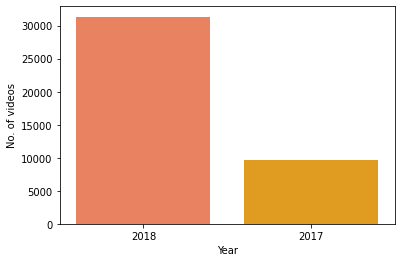

In [13]:
cdf = df["trending_date"].apply(lambda x: '20' + x[:2]).value_counts() \
            .to_frame().reset_index() \
            .rename(columns={"index": "year", "trending_date": "No_of_videos"})

fig, ax = plt.subplots()
_ = sns.barplot(x="year", y="No_of_videos", data=cdf, 
                palette=sns.color_palette(['#ff764a', '#ffa600'], n_colors=7), ax=ax)
_ = ax.set(xlabel="Year", ylabel="No. of videos")

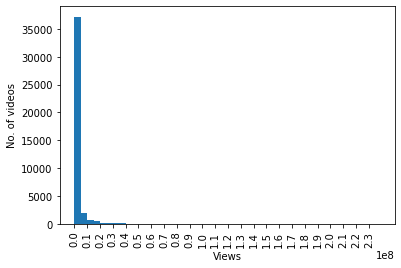

In [14]:
fig, ax = plt.subplots()
_ = sns.distplot(df["views"], kde=False, 
                 hist_kws={'alpha': 1}, bins=np.linspace(0, 2.3e8, 47), ax=ax)
_ = ax.set(xlabel="Views", ylabel="No. of videos", xticks=np.arange(0, 2.4e8, 1e7))
_ = ax.set_xlim(right=2.5e8)
_ = plt.xticks(rotation=90)

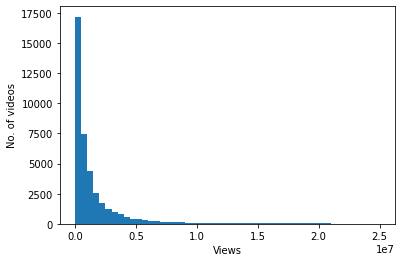

In [15]:
fig,ax=plt.subplots()
_=sns.distplot(df[df['views']<25e6]['views'],kde=False,hist_kws={'alpha': 1},ax=ax)
_=ax.set(xlabel='Views',ylabel='No. of videos')

In [16]:
df[df['views']<1e6]['views'].count()/df['views'].count()*100

60.09426359618062

In [17]:
df.describe(include = ['O'])

,video_id,trending_date,title,channel_title,publish_time,tags,thumbnail_link,description
count,40949,40949,40949,40949,40949,40949,40949,40379
unique,6351,205,6455,2207,6269,6055,6352,6901
top,j4KvrAUjn6c,18.16.02,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,ESPN,2018-05-18T14:00:04.000Z,[none],https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,► Listen LIVE: http://power1051fm.com/\n► Face...
freq,30,200,30,203,50,1535,30,58


In [29]:
#which channel has the maximum views

df_new=df.groupby(['channel_title']).sum('views')
df_new.sort_values(by=['views'],ascending=False)

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
channel_title,,,,,,,,
ChildishGambinoVEVO,250,3758488765,96700818,6054434,10151289,0,0,0
ibighit,800,2235906679,199247121,3467306,31817464,0,0,0
Dude Perfect,2227,1870085178,60275557,1501477,4009163,0,0,0
Marvel Entertainment,2824,1808998971,55873344,1031250,6453560,0,0,0
ArianaGrandeVevo,430,1576959172,52170970,1931230,4295333,0,0,0
...,...,...,...,...,...,...,...,...
CHauserable,23,1807,6,3,0,0,0,0
Total Combat,17,1722,17,3,1,0,0,0
OjO Commuter Scooter by OjO Electric,38,1706,6,1,0,0,0,0


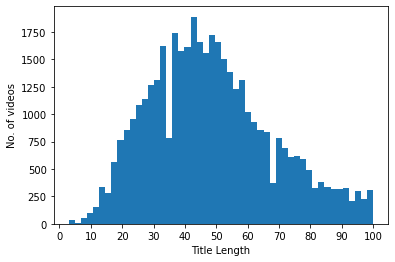

In [31]:
#Video title lengths

df["title_length"] = df["title"].apply(lambda x: len(x))

fig, ax = plt.subplots()
_ = sns.distplot(df["title_length"], kde=False, rug=False, 
                  hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Title Length", ylabel="No. of videos", xticks=range(0, 110, 10))

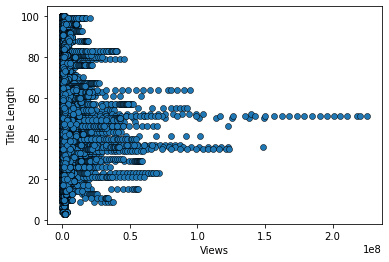

In [33]:
#let's draw a scatter plot between title length and number of views to see the relationship between these two variables

fig, ax = plt.subplots()
_ = ax.scatter(x=df['views'], y=df['title_length'], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="Views", ylabel="Title Length")